In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("iris/iris.csv", header=None)

In [3]:
def encode_textdata(ds, column):
    ids = {name: id for name, id in zip(list(ds[column].unique()), range(ds.shape[0]))}
    return ids, ds[column].transform(lambda x: ids[x])

In [4]:
ids, dataslice = encode_textdata(dataset, 4)

In [5]:
x = dataset[[0, 1, 2, 3]]

In [6]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.fit_transform(x)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, dataslice, test_size=0.3, random_state=42)

In [9]:
sepal_length = ctrl.Antecedent(np.arange(x[:, 0].min(), x[:, 0].max(), 0.1), 'sepal_length')
sepal_width = ctrl.Antecedent(np.arange(x[:, 1].min(), x[:, 1].max(), 0.1), 'sepal_width')
petal_length = ctrl.Antecedent(np.arange(x[:, 2].min(), x[:, 2].max(), 0.1), 'petal_length')
petal_width = ctrl.Antecedent(np.arange(x[:, 3].min(), x[:, 3].max(), 0.1), 'petal_width')
y_class = ctrl.Consequent(np.arange(0, 3, 1), 'y_class')


sepal_length.automf(3)
sepal_width.automf(3)
petal_length.automf(3)
petal_width.automf(3)


y_class['Iris-setosa'] = fuzz.trimf(y_class.universe, [0, 0, 0.5])
y_class['Iris-versicolor'] = fuzz.trimf(y_class.universe, [0, 1, 2])
y_class['Iris-virginica'] = fuzz.trimf(y_class.universe, [1.5, 2, 2])

# views

C:\Users\da4nik\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


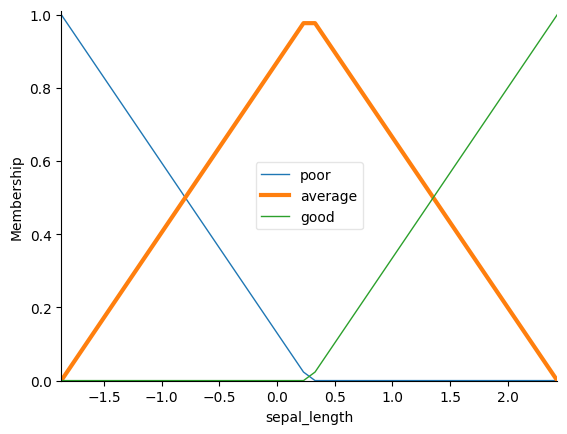

In [11]:
sepal_length['average'].view()

C:\Users\da4nik\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


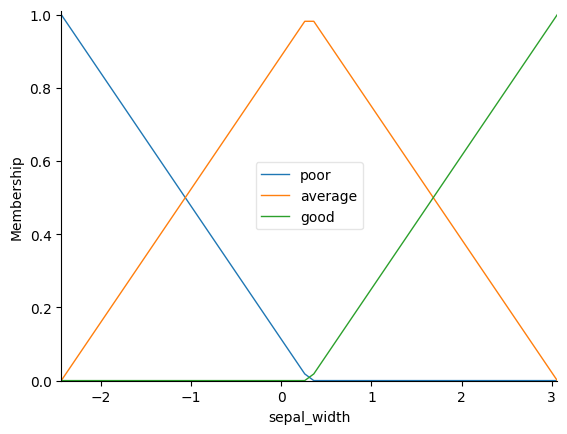

In [13]:
sepal_width.view()

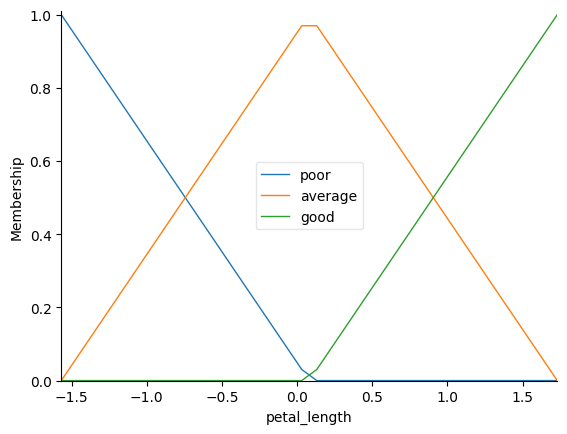

In [16]:
petal_length.view()

C:\Users\da4nik\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


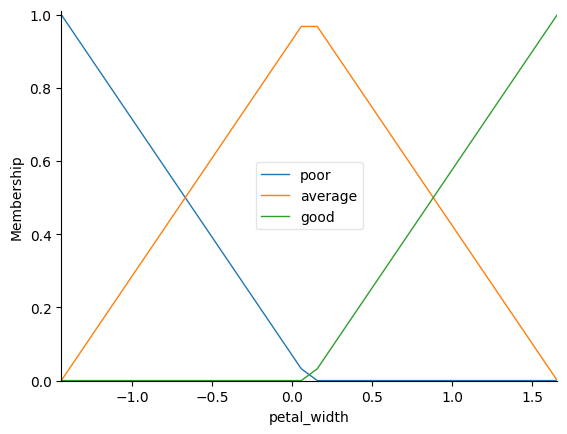

In [15]:
petal_width.view()

# Rules

In [13]:
rule1 = ctrl.Rule(sepal_length["poor"] & sepal_width["poor"] & petal_length["poor"] & petal_width["poor"], y_class['Iris-setosa'])
rule2 = ctrl.Rule(sepal_length["average"] & sepal_width["average"] & petal_length["average"] & petal_width["average"], y_class['Iris-versicolor'])
rule3 = ctrl.Rule(sepal_length["good"] & sepal_width["good"] & petal_length["good"] & petal_width["good"], y_class['Iris-virginica'])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

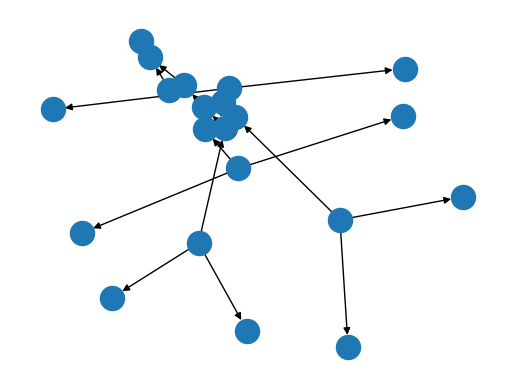

In [15]:
rule1.view()

In [16]:
iris_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
iris_system = ctrl.ControlSystemSimulation(iris_ctrl)

In [20]:
iris_system.input['sepal_length'] = 1.0
iris_system.input['sepal_width'] = 1.5
iris_system.input['petal_length'] = 1.0
iris_system.input['petal_width'] = 0.5

iris_system.compute()

1.0643949406635493


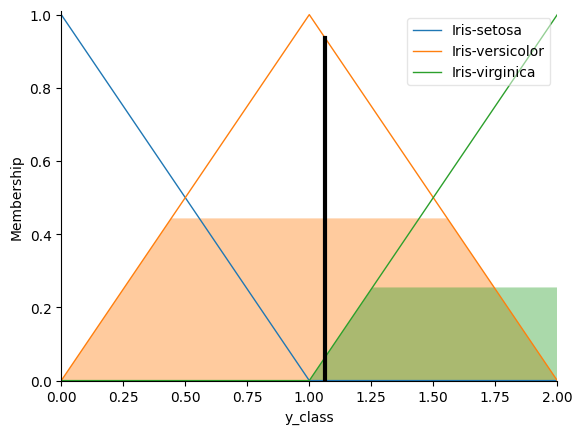

In [21]:
print(iris_system.output['y_class'])
y_class.view(sim=iris_system)

# Other

sepal_length_short = fuzz.trimf(sepal_length.universe, [x[:, 0].min(), x[:, 0].min(), x[:, 0].mean()])
sepal_length_medium = fuzz.trimf(sepal_length.universe, [x[:, 0].min(), x[:, 0].mean(), x[:, 0].max()])
sepal_length_long = fuzz.trimf(sepal_length.universe, [x[:, 0].mean(), x[:, 0].max(), x[:, 0].max()])

sepal_width_narrow = fuzz.trapmf(sepal_width.universe, [x[:, 1].min(), x[:, 1].min(), x[:, 1].mean(), x[:, 1].mean()+0.5])
sepal_width_medium = fuzz.trimf(sepal_width.universe, [x[:, 1].min(), x[:, 1].mean(), x[:, 1].max()])
sepal_width_wide = fuzz.trapmf(sepal_width.universe, [x[:, 1].mean(), x[:, 1].mean()+0.5, x[:, 1].max(), x[:, 1].max()])

petal_length_short = fuzz.trimf(petal_length.universe, [x[:, 2].min(), x[:, 2].min(), x[:, 2].mean()])
petal_length_medium = fuzz.trimf(petal_length.universe, [x[:, 2].min(), x[:, 2].mean(), x[:, 2].max()])
petal_length_long = fuzz.trimf(petal_length.universe, [x[:, 2].mean(), x[:, 2].max(), x[:, 2].max()])

petal_width_narrow = fuzz.trapmf(petal_width.universe, [x[:, 3].min(), x[:, 3].min(), x[:, 3].mean(), x[:, 3].mean()+0.5])
petal_width_medium = fuzz.trimf(petal_width.universe, [x[:, 3].min(), x[:, 3].mean(), x[:, 3].max()])
petal_width_wide = fuzz.trapmf(petal_width.universe, [x[:, 3].mean(), x[:, 3].mean()+0.5, x[:, 3].max(), x[:, 3].max()])

In [10]:
rule1 = ctrl.Rule(sepal_length_short & sepal_width_narrow & petal_length_short & petal_width_narrow, y_class['Iris-setosa'])
rule2 = ctrl.Rule(sepal_length_medium & sepal_width_medium & petal_length_medium & petal_width_medium, y_class['Iris-versicolor'])
rule3 = ctrl.Rule(sepal_length_long & sepal_width_wide & petal_length_long & petal_width_wide, y_class['Iris-virginica'])

iris_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
iris_system = ctrl.ControlSystemSimulation(iris_ctrl)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [34]:
#rule1 = ctrl.Rule(fuzz.fuzzy_and(sepal_length_short, fuzz.fuzzy_and(sepal_width_narrow, fuzz.fuzzy_and(petal_length_short, petal_width_narrow))), iris_class['Iris-setosa'])
rule1 = ctrl.Rule(sepal_length_short and sepal_width_narrow and petal_length_short and petal_width_narrow, y_class['Iris-setosa'])
rule2 = ctrl.Rule(sepal_length_medium and sepal_width_medium and petal_length_medium and petal_width_medium, y_class['Iris-versicolor'])
rule3 = ctrl.Rule(sepal_length_long and sepal_width_wide and petal_length_long and petal_width_wide, y_class['Iris-virginica'])

iris_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
iris_system = ctrl.ControlSystemSimulation(iris_ctrl)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [18]:
#rule1 = ctrl.Rule(fuzz.fuzzy_and(sepal_length_short, fuzz.fuzzy_and(sepal_width_narrow, fuzz.fuzzy_and(petal_length_short, petal_width_narrow))), iris_class['Iris-setosa'])
rule1 = ctrl.Rule(fuzz.fuzzy_and(sepal_length_short, [x[:, 0].min(), x[:, 0].min(), x[:, 0].mean()], 
                                 sepal_length_short, sepal_width_narrow, sepal_width_narrow, petal_length_short, petal_length_short.mf, petal_width_narrow, petal_width_narrow.mf), iris_class['Iris-setosa'])
rule2 = ctrl.Rule(fuzz.fuzzy_and(sepal_length_medium.universe, fuzz.fuzzy_and(sepal_width_medium, fuzz.fuzzy_and(petal_length_medium, petal_width_medium))), iris_class['Iris-versicolor'])
rule3 = ctrl.Rule(fuzz.fuzzy_and(sepal_length_long.universe, fuzz.fuzzy_and(sepal_width_wide, fuzz.fuzzy_and(petal_length_long, petal_width_wide))), iris_class['Iris-virginica'])

iris_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
#iris_system = ctrl.ControlSystemSimulation(iris_ctrl)

AttributeError: 'numpy.ndarray' object has no attribute 'mf'

In [26]:
rule1 = ctrl.Rule(fuzz.fuzzy_and(np.arange(x[:, 0].min(), x[:, 0].max(), 0.1), sepal_length_short,
                                np.arange(x[:, 1].min(), x[:, 1].max(), 0.1), sepal_width_narrow), y_class['Iris-setosa']) 

ValueError: Unexpected antecedent type

In [28]:
rule1 = ctrl.Rule(sepal_length_short & sepal_width_narrow & petal_length_short & petal_width_narrow, y_class['Iris-setosa'])

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''